# 03 Visualisering og analyse
Vi importerer et regneark og ser hva vi finner.

* Datasett: barentshavet-sorost-fremskriving.xlsx
* Kilde: Teknisk Ukeblad
* URL: https://www.tu.no/artikler/oljemyndighetenes-excel-feil-ble-ikke-oppdaget-stortinget-apnet-barentshavet-sorost-med-regnefeil-pa-over-100-milliarder/405367
* Hentet: 28.10.2017

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Importer datasett
Vi har hentet ned datasett fra Oljedirektoratet (via TU). Vi synes tallene virker rare og vil sjekke de.

In [9]:
df = pd.read_excel('data/barentshavet-sorost-fremskriving.xlsx')

Hvordan ser dataene ut og har vi alle? Vi vet at det skal være 24 rader med data (2027 - 2050)

In [10]:
df.head(n=3)

,årstall,olje,gass
0,2027,0.0,0.0
1,2028,0.0,0.0
2,2029,2.3,2.0


In [11]:
df.describe()

,årstall,olje,gass
count,24.000000,24.000000,24.000000
mean,2038.500000,1.249583,2.450000
std,7.071068,3.066884,5.997318
min,2027.000000,0.000000,0.000000
25%,2032.750000,0.000000,0.075000
50%,2038.500000,0.085000,0.900000
75%,2044.250000,1.547500,2.925000
max,2050.000000,15.000000,30.000000


Standardavviket mye større enn en median, hva er det som foregår her?
* Gjennomsnitt (mean): Sier noe om hvor senterpunkt for dataene er.
* Standardavvik (std): Sier noe om spredningen på dataene.
Altså er det noe i dataene som drar standardavviket opp.

Som vi husker har vi også median som er midtpunktet av tallene i datasettet vårt.

In [21]:
df.gass.median()

0.9

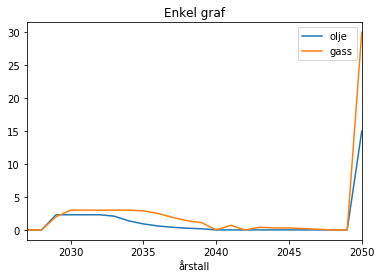

In [16]:
df.plot(title="Enkel graf", x="årstall", y=["olje", "gass"])

Vi aner i ugler i mosen av den voldsomme økningen i 2050. Hva kan ha skjedd her? Magen sier at her har det vært en tastefeil.

In [27]:
df.tail(n=5)

,årstall,olje,gass
19,2046,0.0,0.2
20,2047,0.0,0.1
21,2048,0.0,0.0
22,2049,0.0,0.0
23,2050,15.0,30.0


Enten skulle det vært et komma i 2050, men det virker rart med plutselig hopp. Kan det være sum?

In [28]:
df.gass.sum()

58.8

In [29]:
df.olje.sum()

29.99

In [33]:
df_pre2050 = df[df['årstall'] < 2050]

In [34]:
df_pre2050.sum()

årstall    46874.00
olje          14.99
gass          28.80
dtype: float64

In [ ]:
olje_mindreenn = df[df['årstall'] < 2050]
olje_mindre_enn['olje'].sum()